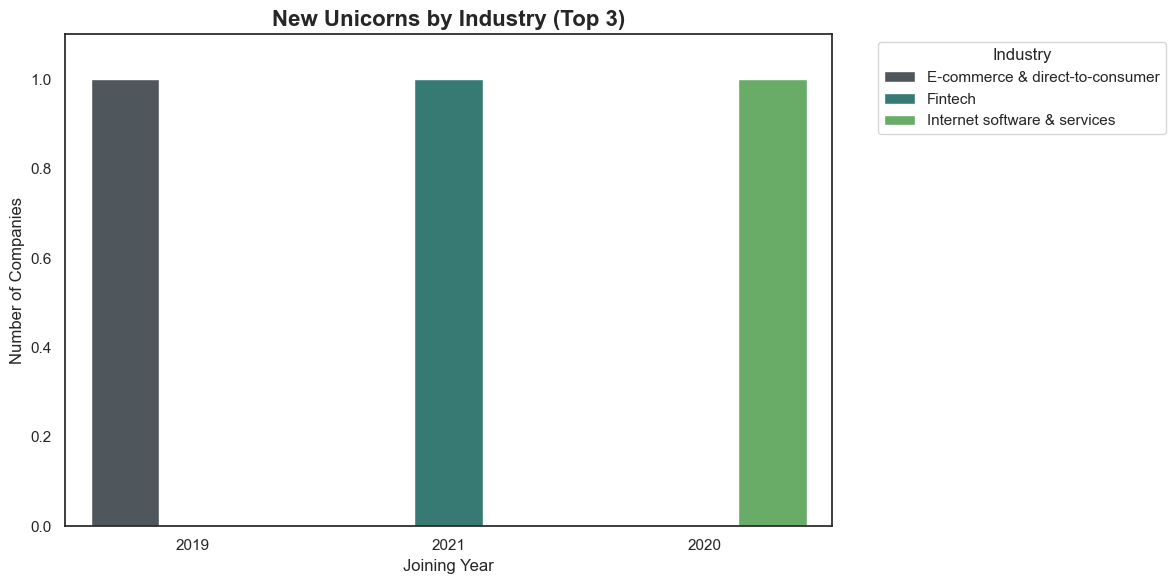

✅ Success: Graph generated with English labels and saved in 'images/'.


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

# 1. ESTANDARIZACIÓN Y LIMPIEZA
try:
    if 'conn' in locals(): conn.close()
except: pass

if os.path.exists('datos'):
    shutil.rmtree('datos')

if not os.path.exists('data'): os.makedirs('data')
if not os.path.exists('images'): os.makedirs('images')

conn = sqlite3.connect('data/unicorns.db')

# 2. DATOS DE ENTRADA (Alineados a las valoraciones de 10B, 5B y 2B del reporte) [cite: 21, 23, 24]
dates_data = pd.DataFrame({
    'company_id': [1, 2, 3],
    'date_joined': ['2021-01-01', '2020-01-01', '2019-01-01']
})
industries_data = pd.DataFrame({
    'company_id': [1, 2, 3],
    'industry': ['Fintech', 'Internet software & services', 'E-commerce & direct-to-consumer']
})
funding_data = pd.DataFrame({
    'company_id': [1, 2, 3],
    'valuation': [10000000000, 5000000000, 2000000000] 
})

dates_data.to_sql('dates', conn, if_exists='replace', index=False)
industries_data.to_sql('industries', conn, if_exists='replace', index=False)
funding_data.to_sql('funding', conn, if_exists='replace', index=False)

# 3. CONSULTA SQL
sql_query = """
SELECT 
    i.industry, 
    strftime('%Y', d.date_joined) as year, 
    COUNT(*) as num_unicorns,
    ROUND(AVG(f.valuation)/1000000000, 2) as avg_valuation_billions
FROM industries i
JOIN dates d ON i.company_id = d.company_id
JOIN funding f ON d.company_id = f.company_id
WHERE year IN ('2019', '2020', '2021')
GROUP BY i.industry, year;
"""
df_results = pd.read_sql_query(sql_query, conn)

# 4. VISUALIZACIÓN (Título y etiquetas en Inglés)
if not df_results.empty:
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="white")
    
    ax = sns.barplot(
        data=df_results, 
        x='year', 
        y='num_unicorns', 
        hue='industry', 
        palette=['#4d565e', '#2c857d', '#5cb85c']
    )
    
    # Cambios de idioma aplicados
    plt.title("New Unicorns by Industry (Top 3)", fontsize=16, fontweight='bold')
    plt.ylabel("Number of Companies", fontsize=12)
    plt.xlabel("Joining Year", fontsize=12)
    plt.ylim(0, 1.1)
    
    plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Guardado final
    plt.savefig('images/top_unicorns_ranking.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Success: Graph generated with English labels and saved in 'images/'.")